In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
from matplotlib.ticker import FuncFormatter

In [6]:
pd.set_option('display.max_rows',100)

In [103]:
predict_date='2018_12_23'

## Consumption_afterPV mode peakload already reduced from discharge but mode dutycycle not reduced

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


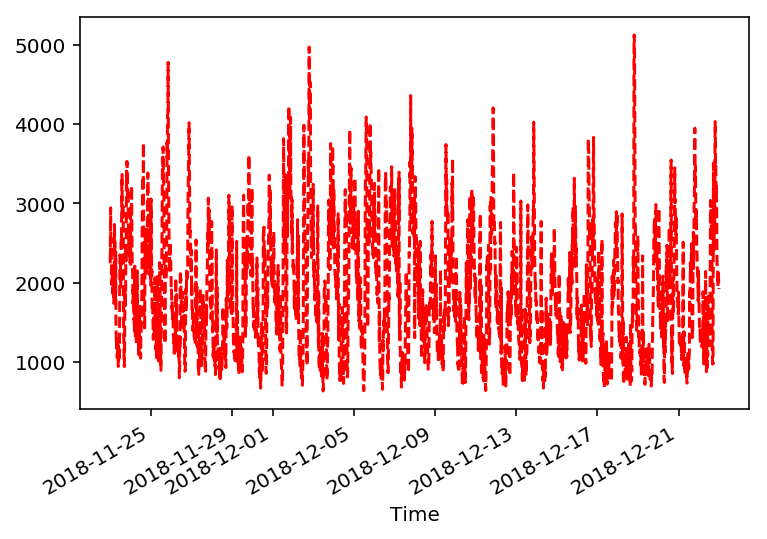

In [104]:
num_day=30

predict_day=int(predict_date[8:])
predict_month=int(predict_date[5:7])
predict_year=int(predict_date[0:4])

str(predict_year)+'_'+str(predict_month)+'_'+str(predict_day)

daybefore=[]
pmb=predict_month-1
dayleft=num_day-predict_day

if predict_day>=num_day:
    day=predict_day-num_day
    while day<predict_day:
        daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(day).zfill(2))
        day+=1
else:
    if pmb==1 or pmb==3 or pmb==5 or pmb==7 or pmb==8 or pmb==10 or pmb==12:
        for i in range(31-dayleft,32,1):
            daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
        for i in range(1,predict_day,1):
            daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
    elif pmb==4 or pmb==6 or pmb==9 or pmb==11:
        for i in range(30-dayleft,31,1):
            daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
        for i in range(1,predict_day,1):
            daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
    else:
        if predict_year%4==0:
            for i in range(29-dayleft,30,1):
                daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
            for i in range(1,predict_day,1):
                daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))
        else:
            for i in range(28-dayleft,29,1):
                daybefore.append(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(i).zfill(2))
            for i in range(1,predict_day,1):
                daybefore.append(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(i).zfill(2))

pathlist=[]
for i in daybefore:
    pathlist.append('Energy_Balance_'+str(i))

def clean(path):
    rawdata=pd.read_csv(path+".csv", delimiter=";" )
    deleteindex=rawdata.loc[rawdata.loc[pd.IndexSlice[:,'Battery discharging / Mean values [W] ']]==' '].index
    rawdata.drop(deleteindex,inplace=True)
    rawdata.rename(columns={' ':'Time'},inplace=True)
    rawdata['Time']=rawdata['Time'].str.replace('[^\d]','')
    rawdata['Time']=path[15:19]+path[20:22]+path[23:]+rawdata['Time']
    rawdata['Time']=pd.to_datetime(rawdata.Time)
    rawdata.set_index('Time', inplace=True)
    for i in rawdata.columns:
        if i != 'Direct consumption / Mean values [W] ' and i != 'Battery discharging / Mean values [W] ' and i!='External energy supply / Mean values [W] ' and i != 'PV power generation / Mean values [W]  ':
            rawdata.drop([i],axis=1,inplace=True)
    for i in rawdata.columns:
        rawdata[i].fillna('0',inplace=True)
        rawdata[i]=rawdata[i].apply(lambda x: x.replace(' ', '0'))
        rawdata[i]=rawdata[i].str.replace('\D','').astype(int)
    rawdata['Consumption']=rawdata['Direct consumption / Mean values [W] ']+rawdata['Battery discharging / Mean values [W] ']+rawdata['External energy supply / Mean values [W] ']
    rawdata.rename(columns={'PV power generation / Mean values [W]  ':'Generation'},inplace=True)
    rawdata.drop(['Direct consumption / Mean values [W] ', 'Battery discharging / Mean values [W] ','External energy supply / Mean values [W] '],axis=1,inplace=True)
    rawdata.drop(['Generation'],axis=1,inplace=True)
    return rawdata

rawdata=[]

for i in pathlist:
    df=clean(i)
    rawdata.append(df)
    

data=rawdata[0]
for i in range(num_day-1):
    data=pd.concat([data,rawdata[i+1]])
    

for i in range(data.shape[0]):
    if data.iloc[i,0]==0:
        data.iloc[i,0]=data.iloc[i-96,0]

fit4 = ExponentialSmoothing(data.Consumption, seasonal_periods=96, trend='add' ,seasonal='mul').fit()

fit4.fittedvalues.plot(style='--', color='red')

forecast=fit4.forecast(96)

params=fit4.model.params


In [105]:
forecast

2880    1872.518343
2881    1899.494345
2882    1741.397676
2883    1707.772945
2884    1724.572552
2885    1594.328809
2886    1435.407246
2887    1497.030132
2888    1405.212670
2889    1384.819216
2890    1361.323282
2891    1280.213954
2892    1311.910126
2893    1282.970798
2894    1268.647685
2895    1208.047375
2896    1244.682589
2897    1210.314931
2898    1348.506273
2899    1939.178435
2900    1914.919660
2901    2273.717507
2902    1494.796664
2903    1189.935263
2904    1184.838168
2905    1721.158649
2906    1075.213634
2907    1040.634987
2908    1014.946755
2909    1034.033778
2910    1187.284208
2911    1220.565709
2912    1012.386684
2913    1046.495692
2914    1002.995629
2915     998.576055
2916    1193.272797
2917    1101.919554
2918    1053.704540
2919    1018.414480
2920    1218.752109
2921    1292.306635
2922    1312.458420
2923    1322.368271
2924    1231.688689
2925    1240.658876
2926    1101.247876
2927    1084.913938
2928    1219.406220
2929    1352.461655


In [106]:
Consumption=[]
for i in forecast:
    Consumption.append(i)
Consumption

[1872.5183427015284,
 1899.494344600498,
 1741.3976755594667,
 1707.7729451554617,
 1724.5725524075553,
 1594.3288089759658,
 1435.4072461996511,
 1497.0301323034892,
 1405.2126699519451,
 1384.8192157776828,
 1361.323281572436,
 1280.2139539184582,
 1311.9101255091232,
 1282.9707983812723,
 1268.647685444626,
 1208.0473753939275,
 1244.682589432816,
 1210.3149313763229,
 1348.506272857689,
 1939.1784350833937,
 1914.9196598044298,
 2273.7175074223887,
 1494.7966639063723,
 1189.935263420551,
 1184.8381678789412,
 1721.1586487074674,
 1075.2136335630262,
 1040.6349872875646,
 1014.9467545288668,
 1034.033777866081,
 1187.2842080390667,
 1220.5657093390319,
 1012.3866840724655,
 1046.4956919361273,
 1002.9956294058707,
 998.5760553185684,
 1193.2727968616216,
 1101.9195537252021,
 1053.7045399599585,
 1018.4144799215982,
 1218.752108602186,
 1292.3066346717744,
 1312.4584198252023,
 1322.3682706398934,
 1231.6886886046327,
 1240.6588757163345,
 1101.2478757434615,
 1084.9139376529768,
 

In [107]:
predictday=predict_date[0:4]+predict_date[5:7]+predict_date[8:10]
minu=[]
h=[]
m=[]
index=[]
Time=[]
for i in range(1,96):
    minu.append(str((i%4)*15).zfill(2))
    h.append(str(i//4).zfill(2))
for i in range(1,96):
    index.append(predictday+h[i-1]+minu[i-1])
for i in index:
    Time.append(pd.to_datetime(i))
Time.append(pd.to_datetime(predictday+'0000'))
len(Time)
    

    
#pd.to_datetime('201812230010')

96

## Create Dataframe

In [108]:
DF = pd.DataFrame()
DF['Consumption']=Consumption
DF['Time']=Time
DF.set_index('Time',inplace=True)
DF

,Consumption
Time,
2018-12-23 00:15:00,1872.518343
2018-12-23 00:30:00,1899.494345
2018-12-23 00:45:00,1741.397676
2018-12-23 01:00:00,1707.772945
2018-12-23 01:15:00,1724.572552
2018-12-23 01:30:00,1594.328809
2018-12-23 01:45:00,1435.407246
2018-12-23 02:00:00,1497.030132
2018-12-23 02:15:00,1405.212670


In [109]:
def dutycyclemode(rawdata,percent_batt):
    batt=percent_batt*96
    Consumption_afterPV=[]
    Charge=[]
    for i in rawdata.index:
        if rawdata.loc[i,'Generation']>=rawdata.loc[i,'Consumption']:
            Charge.append(rawdata.loc[i,'Generation']-rawdata.loc[i,'Consumption'])
            Consumption_afterPV.append(0)
        else:
            Charge.append(0)
            Consumption_afterPV.append(rawdata.loc[i,'Consumption']-rawdata.loc[i,'Generation'])    

    rawdata['Charge']=Charge
    rawdata['Consumption_afterPV']=Consumption_afterPV

    totalcharge=rawdata['Charge'].sum()/4

    datanotstart=rawdata[rawdata.Generation==0]
    dataonlystart=rawdata[rawdata.Generation!=0]
    start_time=dataonlystart.index[0]
    consumption_night=rawdata.loc[:start_time,'Consumption'].sum()/4

    if totalcharge+batt>9600:
        discharge_only_at_night=1
    else:
        discharge_only_at_night=0

    if batt-consumption_night>0.6*9600:
        batt_start=batt-consumption
    else:
        batt_start=0.6*9600


    contactor=[]

    for i in rawdata[rawdata.index[0]:start_time].drop(start_time).index:
        if discharge_only_at_night==1:
            contactor.append(1)
        else:
            contactor.append(0)

    for i in rawdata[start_time:].index:
        if rawdata.loc[i,'Charge'] > 0:
            contactor.append(1)
        elif batt_start+totalcharge <= 9600:
            contactor.append(0)
        else:
            contactor.append(1)

    rawdata['Contactor']=contactor

    remain=totalcharge*4

    rawdata['Discharge']=rawdata['Contactor']*0
    for i in rawdata.index:
        if rawdata.loc[i,'Contactor']==1 and rawdata.loc[i,'Charge']==0:
            if remain >= rawdata.loc[i,'Consumption_afterPV']:
                rawdata.loc[i,'Discharge']= rawdata.loc[i,'Consumption_afterPV']
                remain=remain- rawdata.loc[i,'Consumption_afterPV']
            else:
                rawdata.loc[i,'Discharge']=remain
                remain=0
    return rawdata


In [110]:
def peakloadmode(rawdata,percent_batt):
    batt=percent_batt*96
    Consumption_afterPV=[]
    Charge=[]
    for i in rawdata.index:
        if rawdata.loc[i,'Generation']>=rawdata.loc[i,'Consumption']:
            Charge.append(rawdata.loc[i,'Generation']-rawdata.loc[i,'Consumption'])
            Consumption_afterPV.append(0)
        else:
            Charge.append(0)
            Consumption_afterPV.append(rawdata.loc[i,'Consumption']-rawdata.loc[i,'Generation'])    

    rawdata['Charge']=Charge
    rawdata['Consumption_afterPV']=Consumption_afterPV

    totalcharge=rawdata['Charge'].sum()

    data=rawdata

    peakloadtotal=0

    for i in range(1,96):
        peakloaddf=data.nlargest(i,columns='Consumption_afterPV').Consumption_afterPV
        #print(peakloaddf)
        peakload=peakloaddf.iloc[i-1:i]
        peakloadtotal += peakload.iloc[0]
       # print(peakload)
        #print(peakloadtotal)
        if peakloadtotal>=totalcharge:
            remain=(peakloadtotal-totalcharge)
            #print(remain)
            for j in peakloaddf.index:
                data.loc[j:j,'Consumption_afterPV']=0
            data.loc[peakload.index,'Consumption_afterPV']=remain
            break

    data['Discharge']=data.Consumption_afterPV*0
    for i in peakloaddf.index:
        data.loc[i:i,'Discharge']=data.loc[i:i,'Consumption']-data.loc[i:i,'Generation']-data.loc[i:i,'Consumption_afterPV']

    Contactor=[]
    for i in data.index:
        if data.loc[i,'Charge']>0:
            Contactor.append(1)
        elif data.loc[i,'Discharge']>0:
            Contactor.append(1)
        else:
            Contactor.append(0)
    data['Contactor']=Contactor
    return data

In [111]:
import os
import pandas as pd
import json
import datetime

def createDayDataframe(filename):
    path = "tongsdata/"
    filedate = filename.split(".")[0].split("-")

    with open(path + filename, 'r', encoding='utf-8') as fin:
        data_json = json.loads(fin.read())

    #  Create X DataFrame
    todayData = {time: data_json[time]['currently'] for time in data_json}
    todayData_DF = pd.DataFrame(todayData).T

    #  Create y DataFrame
    energyBalanceFilename = "energyBalance/Energy_Balance_{}_{}_{}.csv".format(filedate[0], filedate[1], filedate[2]) #change due to json filename
    energyBalance = pd.read_csv(path + energyBalanceFilename, delimiter=";")

    energyBalance_DF = pd.DataFrame(index=energyBalance.iloc[:-1,0].apply(lambda x: x[2:-1]))
    energyBalance_DF['PV Power Generation'] = energyBalance['PV power generation / Mean values [W]  '].values[:-1]
    energyBalance_DF = energyBalance_DF[energyBalance_DF != ' ']
    energyBalance_DF = energyBalance_DF.dropna()
    
    #  Join X y DataFrame
    data = todayData_DF.join(energyBalance_DF)
    return data

def cleanDataframe(masterDF):
    masterData_cleaned = masterDF.reset_index()
    masterData_cleaned = masterData_cleaned.rename(columns={'index': 'time_of_day'})
    masterData_cleaned = masterData_cleaned[masterData_cleaned['PV Power Generation'].notna()]
    #masterData_cleaned['month'] = masterData_cleaned['time'].apply(datetime.datetime.fromtimestamp).apply(lambda x: x.month)
    masterData_cleaned['cloudCover'] = masterData_cleaned['cloudCover'].fillna(value=masterData_cleaned['cloudCover'].mean())
    masterData_cleaned['PV Power Generation'] = masterData_cleaned['PV Power Generation'].apply(lambda x: x.replace(",", "")).astype('float')
    return masterData_cleaned

def featureEngineering(masterDF):
    masterDF = masterDF.drop(columns=['icon', 'summary', 'time', 'windBearing', 'windGust', 'ozone', 'precipIntensity', 'precipProbability','pressure','precipType'])
    masterDF = pd.get_dummies(masterDF, columns=['time_of_day']) 
    return masterDF

files = os.listdir("tongsdata/")

#files.remove(".DS_Store")
files.remove("energyBalance")

masterData = pd.DataFrame()

for file in files:
    r = createDayDataframe(file).loc['06:30':'18:00']
    print(file, r.shape)
    masterData = pd.concat([masterData, r], axis=0)
    
masterData = cleanDataframe(masterData)
masterData = featureEngineering(masterData)

features = list(masterData.drop(columns=['PV Power Generation']).columns)

masterData = masterData.dropna()

X = masterData.drop(columns=['PV Power Generation']).astype('float').values
y = masterData['PV Power Generation'].astype('float').values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

training_features, testing_features, training_target, testing_target = train_test_split(X, y)

# Average CV score on the training set was:-91867.4890210794
exported_pipeline = RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=1, min_samples_split=7, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
print(mean_squared_error(testing_target, results), 
mean_absolute_error(testing_target, results), 
r2_score(testing_target, results))

2018-10-01.json (47, 15)
2018-10-02.json (47, 14)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



2018-10-03.json (47, 14)
2018-10-04.json (47, 15)
2018-10-05.json (47, 15)
2018-10-06.json (47, 15)
2018-10-07.json (47, 15)
2018-10-08.json (47, 15)
2018-10-09.json (47, 15)
2018-10-10.json (47, 15)
2018-10-11.json (47, 15)
2018-10-12.json (47, 15)
2018-10-13.json (47, 14)
2018-10-14.json (47, 15)
2018-10-15.json (47, 15)
2018-10-16.json (47, 15)
2018-10-17.json (47, 14)
2018-10-18.json (47, 14)
2018-10-19.json (47, 15)
2018-10-20.json (47, 15)
2018-10-21.json (47, 15)
2018-10-22.json (47, 15)
2018-10-23.json (47, 15)
2018-10-24.json (47, 14)
2018-10-25.json (47, 15)
2018-10-26.json (47, 15)
2018-10-27.json (47, 15)
2018-10-28.json (47, 15)
2018-10-29.json (47, 15)
2018-10-30.json (47, 15)
2018-10-31.json (47, 15)
2018-11-01.json (47, 15)
2018-11-02.json (47, 13)
2018-11-03.json (47, 15)
2018-11-04.json (47, 14)
2018-11-05.json (47, 14)
2018-11-06.json (47, 15)
2018-11-07.json (47, 14)
2018-11-08.json (47, 15)
2018-11-09.json (47, 14)
2018-11-10.json (47, 15)
2018-11-11.json (47, 14)


In [112]:
def pvpredict(predict_date) :
    path = "tongsdata/"
    filename = predict_date.replace("_",'-') + '.json'
    
    with open(path + filename, 'r', encoding='utf-8') as fin:
        data_json = json.loads(fin.read())
    
    todayData = {time: data_json[time]['currently'] for time in data_json}
    todayData_DF = pd.DataFrame(todayData).T
    
    todayData_DF.index.names=['time_of_day']
    todayData_DF = todayData_DF.loc['06:30':'18:00']
    todayData_DF = todayData_DF.reset_index()
    #todayData_DF['month'] = todayData_DF['time'].apply(datetime.datetime.fromtimestamp).apply(lambda x: x.month)
    
    todayData_DF['cloudCover'] = todayData_DF['cloudCover'].fillna(value=todayData_DF['cloudCover'].mean())
    dropcolumns=['icon', 'summary', 'time', 'windBearing', 'windGust', 'ozone', 'precipIntensity', 'precipProbability','pressure','precipType']
    for i in dropcolumns:
        if i in todayData_DF.columns:
            todayData_DF = todayData_DF.drop(columns=[i])
    #todayData_DF = pd.get_dummies(todayData_DF, columns=['time_of_day', 'precipType', 'uvIndex', 'month'])
    todayData_DF = pd.get_dummies(todayData_DF, columns=['time_of_day'])
    
    masterData_for_predict = masterData.drop(columns=['PV Power Generation'])
    for i in range(len(masterData_for_predict.columns)) : #drop power balance
        if masterData_for_predict.columns[i] not in todayData_DF.columns:
            todayData_DF.insert(i, masterData.columns[i+1], 0)
    missingvalue = todayData_DF[todayData_DF.isna().any(axis=1)].index
    col = ['apparentTemperature','cloudCover','dewPoint','humidity','temperature','visibility','windSpeed']
    for col in todayData_DF:
        todayData_DF[col] = pd.to_numeric(todayData_DF[col], errors='coerce')
    todayData_DF=todayData_DF.interpolate()
    
    first_predict = todayData_DF.astype('float').values
    
    results_first_predict = exported_pipeline.predict(first_predict)
    results_first_predict = np.array(results_first_predict).tolist()
    for i in range(25):
        results_first_predict.insert(0,0.0)
    for j in range (24):
        results_first_predict.append(0.0)
    return results_first_predict

In [113]:
Generation=pvpredict(predict_date)

In [114]:
DF['Generation']=Generation
DF

,Consumption,Generation
Time,,
2018-12-23 00:15:00,1872.518343,0.000000
2018-12-23 00:30:00,1899.494345,0.000000
2018-12-23 00:45:00,1741.397676,0.000000
2018-12-23 01:00:00,1707.772945,0.000000
2018-12-23 01:15:00,1724.572552,0.000000
2018-12-23 01:30:00,1594.328809,0.000000
2018-12-23 01:45:00,1435.407246,0.000000
2018-12-23 02:00:00,1497.030132,0.000000
2018-12-23 02:15:00,1405.212670,0.000000


## Use Algorithm

In [115]:
dutycyclemode(DF,100)

,Consumption,Generation,Charge,Consumption_afterPV,Contactor,Discharge
Time,,,,,,
2018-12-23 00:15:00,1872.518343,0.000000,0.000000,1872.518343,1,1872.518343
2018-12-23 00:30:00,1899.494345,0.000000,0.000000,1899.494345,1,1899.494345
2018-12-23 00:45:00,1741.397676,0.000000,0.000000,1741.397676,1,1741.397676
2018-12-23 01:00:00,1707.772945,0.000000,0.000000,1707.772945,1,798.267555
2018-12-23 01:15:00,1724.572552,0.000000,0.000000,1724.572552,1,0.000000
2018-12-23 01:30:00,1594.328809,0.000000,0.000000,1594.328809,1,0.000000
2018-12-23 01:45:00,1435.407246,0.000000,0.000000,1435.407246,1,0.000000
2018-12-23 02:00:00,1497.030132,0.000000,0.000000,1497.030132,1,0.000000
2018-12-23 02:15:00,1405.212670,0.000000,0.000000,1405.212670,1,0.000000


## Check Data

In [116]:
def clean1(path):
    rawdata=pd.read_csv(path+".csv", delimiter=";" )
    deleteindex=rawdata.loc[rawdata.loc[pd.IndexSlice[:,'Battery discharging / Mean values [W] ']]==' '].index
    rawdata.drop(deleteindex,inplace=True)
    rawdata.rename(columns={' ':'Time'},inplace=True)
    rawdata['Time']=rawdata['Time'].str.replace('[^\d]','')
    rawdata['Time']=path[15:19]+path[20:22]+path[23:]+rawdata['Time']
    rawdata['Time']=pd.to_datetime(rawdata.Time)
    rawdata.set_index('Time', inplace=True)
    for i in rawdata.columns:
        if i != 'Direct consumption / Mean values [W] ' and i != 'Battery discharging / Mean values [W] ' and i!='External energy supply / Mean values [W] ' and i != 'PV power generation / Mean values [W]  ':
            rawdata.drop([i],axis=1,inplace=True)
    for i in rawdata.columns:
        rawdata[i].fillna('0',inplace=True)
        rawdata[i]=rawdata[i].apply(lambda x: x.replace(' ', '0'))
        rawdata[i]=rawdata[i].str.replace('\D','').astype(int)
    rawdata['Consumption']=rawdata['Direct consumption / Mean values [W] ']+rawdata['Battery discharging / Mean values [W] ']+rawdata['External energy supply / Mean values [W] ']
    rawdata.rename(columns={'PV power generation / Mean values [W]  ':'Generation'},inplace=True)
    rawdata.drop(['Direct consumption / Mean values [W] ', 'Battery discharging / Mean values [W] ','External energy supply / Mean values [W] '],axis=1,inplace=True)
    return rawdata

In [117]:
check=clean1('Energy_Balance_'+predict_date)
check

,Generation,Consumption
Time,,
2018-12-23 00:15:00,0,1840
2018-12-23 00:30:00,0,1658
2018-12-23 00:45:00,0,1806
2018-12-23 01:00:00,0,1672
2018-12-23 01:15:00,0,1509
2018-12-23 01:30:00,0,1429
2018-12-23 01:45:00,0,1806
2018-12-23 02:00:00,0,1675
2018-12-23 02:15:00,0,1429


## Replace Missing data with data from previous day

In [118]:
pmb=predict_month-1
if predict_day>1:
        db=(str(predict_year)+'_'+str(predict_month).zfill(2)+'_'+str(predict_day-1).zfill(2))
else:
    if pmb==1 or pmb==3 or pmb==5 or pmb==7 or pmb==8 or pmb==10 or pmb==12:
        db=(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(31).zfill(2))
    elif pmb==4 or pmb==6 or pmb==9 or pmb==11:
        db=(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(30).zfill(2))
    else:
        if predict_year%4==0:
            db=(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(29).zfill(2))
        else:
            db=(str(predict_year)+'_'+str(pmb).zfill(2)+'_'+str(38).zfill(2))    
dayb=clean1('Energy_Balance_'+db)
for i in range(check.shape[0]):
    if check.iloc[i,1]==0:
        check.iloc[i,0]=dayb.iloc[i,0]
        check.iloc[i,1]=dayb.iloc[i,1]

In [119]:
check

,Generation,Consumption
Time,,
2018-12-23 00:15:00,0,1840
2018-12-23 00:30:00,0,1658
2018-12-23 00:45:00,0,1806
2018-12-23 01:00:00,0,1672
2018-12-23 01:15:00,0,1509
2018-12-23 01:30:00,0,1429
2018-12-23 01:45:00,0,1806
2018-12-23 02:00:00,0,1675
2018-12-23 02:15:00,0,1429


In [120]:
check['ForecastGen']=DF['Generation']
check['ForecastCon']=DF['Consumption']

In [121]:
check

,Generation,Consumption,ForecastGen,ForecastCon
Time,,,,
2018-12-23 00:15:00,0,1840,0.000000,1872.518343
2018-12-23 00:30:00,0,1658,0.000000,1899.494345
2018-12-23 00:45:00,0,1806,0.000000,1741.397676
2018-12-23 01:00:00,0,1672,0.000000,1707.772945
2018-12-23 01:15:00,0,1509,0.000000,1724.572552
2018-12-23 01:30:00,0,1429,0.000000,1594.328809
2018-12-23 01:45:00,0,1806,0.000000,1435.407246
2018-12-23 02:00:00,0,1675,0.000000,1497.030132
2018-12-23 02:15:00,0,1429,0.000000,1405.212670


Text(0, 0.5, 'Watt (W)')

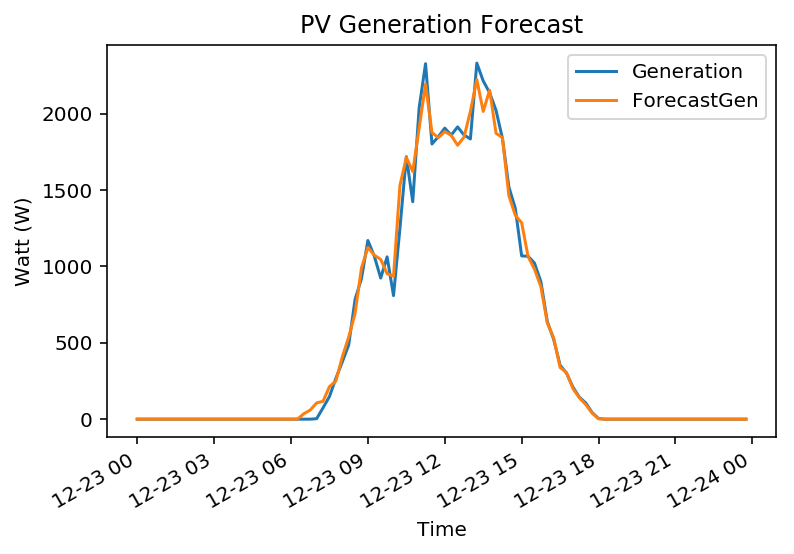

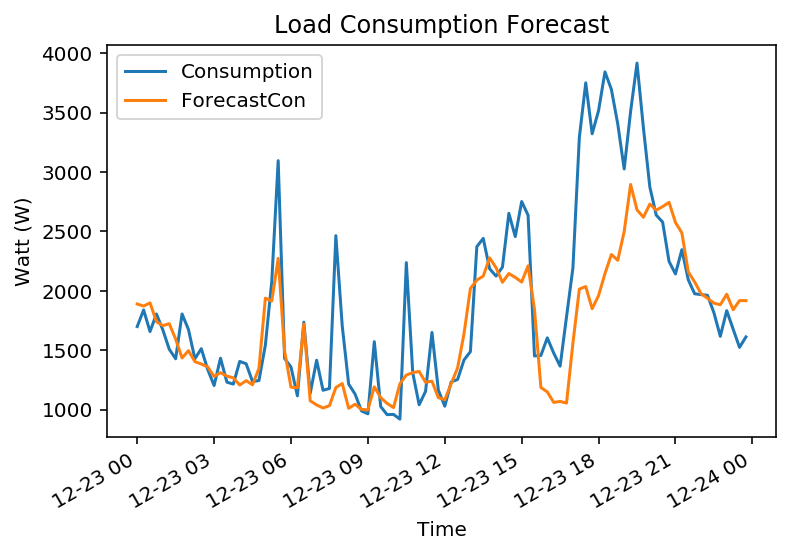

In [122]:
check[['Generation' ,'ForecastGen']].plot(kind='line', title='PV Generation Forecast').set_ylabel('Watt (W)')

check[['Consumption' ,'ForecastCon']].plot(kind='line', title='Load Consumption Forecast').set_ylabel('Watt (W)')

In [123]:
check['Error']=(abs(check['Generation']-check['ForecastGen'])/check['Generation'])*100

In [124]:
check

,Generation,Consumption,ForecastGen,ForecastCon,Error
Time,,,,,
2018-12-23 00:15:00,0,1840,0.000000,1872.518343,NaN
2018-12-23 00:30:00,0,1658,0.000000,1899.494345,NaN
2018-12-23 00:45:00,0,1806,0.000000,1741.397676,NaN
2018-12-23 01:00:00,0,1672,0.000000,1707.772945,NaN
2018-12-23 01:15:00,0,1509,0.000000,1724.572552,NaN
2018-12-23 01:30:00,0,1429,0.000000,1594.328809,NaN
2018-12-23 01:45:00,0,1806,0.000000,1435.407246,NaN
2018-12-23 02:00:00,0,1675,0.000000,1497.030132,NaN
2018-12-23 02:15:00,0,1429,0.000000,1405.212670,NaN


## Dont forget to change date

In [128]:
check.loc['2018-12-23 07:30:00':'2018-12-23 18:00:00','Error'].mean()

7.742140771555487